# XGBoost with carbon, silicon, and nitrgen isotopes
## Added feature importance and confusion matrix

In [18]:
# Imports
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier

## Read the CSV

In [19]:
# load data
#dataset = loadtxt('presolargrains_C_only.csv', delimiter=",")
# Read csv file
C_Si_N = pd.read_csv('presolargrains_C_Si_N.csv')
C_Si_N.head()

,Type,carbon_12_13,nitrogen_14_15,silicon_29_28,silicon_30_28
0,X,74.30,207.4,-685.0,-520.0
1,X,1581.00,116.0,-684.0,-490.0
2,X,234.75,187.2,-683.0,-501.0
3,X,455.00,140.0,-662.0,-770.0
4,X,823.00,44.0,-658.0,-234.0


## Train Test Split

In [20]:
# split data into X and y
X = C_Si_N.loc[::1,'carbon_12_13':'silicon_30_28']
y = C_Si_N['Type']

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Scale the data using MinMaxScalar

In [22]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fit model

In [23]:
# fit model
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

## Print model

In [8]:
# Print model
print(model)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)


## Compare predictions to actual

In [24]:
# Make predictions for test data
y_pred = model.predict(X_test_scaled)
# Create and print dataframe with predicted and actual types
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,X,X
1,X,X
2,M,M
3,AB,Y
4,M,M
5,M,M
6,AB,AB
7,M,M
8,AB,AB
9,AB,AB


## Report Accuracy

In [25]:
# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.32%


## Save the model

In [11]:
# Save model to file (already done)
#filename = 'XGBoost_C_Si_N.sav'
#joblib.dump(model, filename)

['XGBoost_C_Si_N.sav']

## Summary: 

### XGBoost with carbon, silicon, and nitrogen isotopes: 96.3%

## Feature Importance

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.
Code from: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 3 (0.378251)
2. feature 0 (0.352197)
3. feature 1 (0.216598)
4. feature 2 (0.052953)


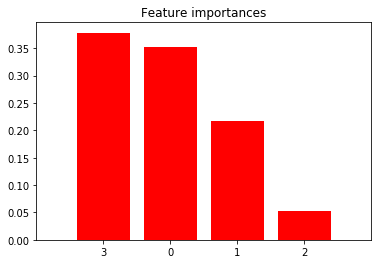

In [12]:
print(__doc__)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(4), importances[indices],
       color="r", align="center")
plt.xticks(range(4), indices)
plt.xlim([-1, 4])
plt.show()

## Confusion Matrix

In [15]:
target_names = ['AB', 'C', 'M', 'N', 'X', 'Y', 'Z']

In [16]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=target_names, index=target_names)
cm

,AB,C,M,N,X,Y,Z
AB,51,0,2,0,0,0,0
C,0,1,0,0,0,0,0
M,0,0,186,0,0,0,0
N,2,0,0,0,0,0,0
X,0,0,2,0,56,1,0
Y,1,0,0,0,0,14,0
Z,0,0,4,0,0,0,6


## Confusion Matrix with heatmap

Text(0.5, 1.0, 'Confusion Matrix XGBoost C Si N')

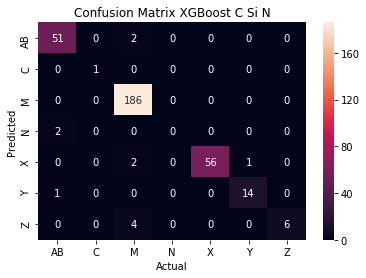

In [17]:
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt="d")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix XGBoost C Si N')